# Linear regression

## Simple linear regression 

input is M x D matrix: M observations, D features (variables):

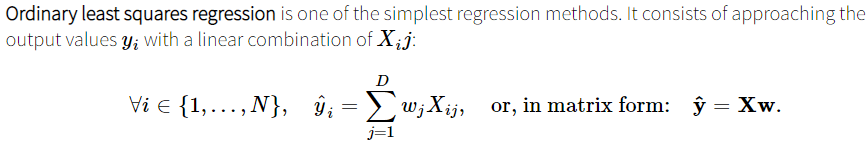

Loss function: ( L2-norm )

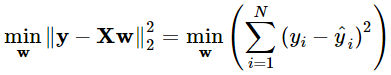

In [69]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
# target concept
def f(x):
    return np.exp(3 * x)

In [71]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [72]:
x = np.array([0, .1, .2, .5, .8, .9, 1])
y = f(x) + 2 * np.random.randn(len(x))  # add some noise

Text(0.5, 1.0, 'Generative model')

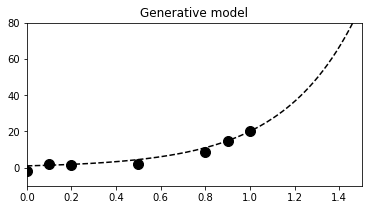

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')

In [74]:
# We create the model.
lr = lm.LinearRegression()

# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y)

# convert to column vector and predict points with our trained model.
y_lr = lr.predict(x_tr[:, np.newaxis])  

Text(0.5, 1.0, 'Linear regression')

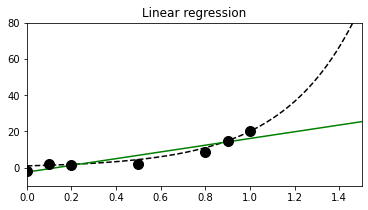

In [75]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x_tr, y_lr, 'g')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title("Linear regression")

## Polynomial linear regression

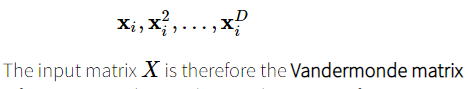
- Training a linear model on these new data points is equivalent to training a polynomial model on the original data points

Coefficients, degree 2:
	 29.32 -10.77 0.00
Coefficients, degree 5:
	 117.60 -394.78 520.55 -279.05 58.21 0.00


Text(0.5, 1.0, 'Linear regression')

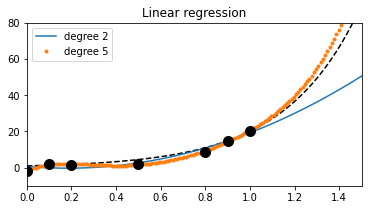

In [76]:
lrp = lm.LinearRegression()
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5], ['-', '.']):
    lrp.fit(np.vander(x, deg+1), y)
    y_lrp = lrp.predict(np.vander(x_tr, deg+1))
    ax.plot(x_tr, y_lrp, s,
            label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:\n\t',
          ' '.join(f'{c:.2f}' for c in lrp.coef_))
ax.plot(x, y, 'ok', ms=10)
ax.set_title("Linear regression")

## Ridge regression

Tikhonov regularization:<br>
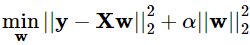

- minimize the error between the model and the data (bias),<br>
- minimize the size of the model's coefficients (variance).<br>
- the bias-variance trade-off is quantified by the hyperparameter α,<br>

Coefficients, degree 2: 13.06 5.00 0.00
Coefficients, degree 5: 5.63 5.09 4.14 2.73 2.47 0.00


Text(0.5, 1.0, 'Ridge regression')

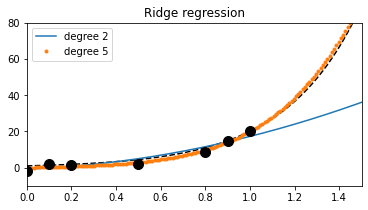

In [77]:
ridge = lm.RidgeCV()

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')

for deg, s in zip([2, 5], ['-', '.']):
    ridge.fit(np.vander(x, deg + 1), y)
    y_ridge = ridge.predict(np.vander(x_tr, deg + 1))
    ax.plot(x_tr, y_ridge, s,
            label='degree ' + str(deg))
    ax.legend(loc=2)
    ax.set_xlim(0, 1.5)
    ax.set_ylim(-10, 80)
    # Print the model's coefficients.
    print(f'Coefficients, degree {deg}:',
          ' '.join(f'{c:.2f}' for c in ridge.coef_))

ax.plot(x, y, 'ok', ms=10)
ax.set_title("Ridge regression")

## K-nearest neighbors

In [78]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
digits = ds.load_digits()
X = digits.data
y = digits.target
print((X.min(), X.max()))
print(X.shape)

(0.0, 16.0)
(1797, 64)


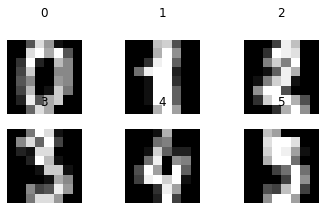

In [80]:
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows, ncols,
                         figsize=(6, 3))
for i in range(nrows):
    for j in range(ncols):
        # Image index
        k = j + i * ncols
        ax = axes[i, j]
        ax.matshow(digits.images[k, ...],
                   cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title(digits.target[k])

In [81]:
(X_train, X_test, y_train, y_test) = ms.train_test_split(X, y, test_size=.25)
knc = nb.KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [82]:
knc.score(X_test, y_test)

0.9933333333333333

Text(0.5, 1.0, 'One')

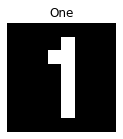

In [83]:
# Let's draw a 1.
one = np.zeros((8, 8))
one[1:-1, 4] = 16  # The image values are in [0, 16].
one[2, 3] = 16
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.imshow(one, interpolation='none',
          cmap=plt.cm.gray)
ax.grid(False)
ax.set_axis_off()
ax.set_title("One")

In [84]:
# We need to pass a (1, D) array.
knc.predict(one.reshape((1, -1)))

array([1])

## Naive Bayes
*make demo about this


In [2]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import sklearn.naive_bayes as nb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('https://github.com/ipython-books/'
                 'cookbook-2nd-data/blob/master/'
                 'troll.csv?raw=true')

In [4]:
df[['Insult', 'Comment']].tail(3)

,Insult,Comment
3944,0,"""@LambeauOrWrigley\xa0\xa0@K.Moss\xa0\nSioux F..."
3945,0,"""How about Felix? He is sure turning into one ..."
3946,0,"""You're all upset, defending this hipster band..."


In [5]:
df[df['Insult']==1]

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
7,1,NaN,"""shut the fuck up. you and the rest of your fa..."
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."
15,1,20120611090207Z,"""FOR SOME REASON U SOUND RETARDED. LOL. DAMN. ..."
...,...,...,...
3929,1,20120619022522Z,"""Why don't you shut your stupid mouth, pennyla..."
3931,1,20120618222326Z,"""You goofy Repub thugs don't have a clue, not ..."
3934,1,20120610083604Z,"""True, maybe he's deliberately being an assh*l..."
3935,1,20120515160649Z,"""JoelWeltman, you look like a pedophile from y..."


In [6]:
y = df['Insult']

In [18]:
# text frequency vector = binary vector for each unique word

tf = text.TfidfVectorizer()
X = tf.fit_transform(df['Comment']) # sparsematrix
print(X)

  (0, 3409)	0.7924564243539206
  (0, 16405)	0.3083197735718549
  (0, 5434)	0.48374631526433
  (0, 16397)	0.20722267055750063
  (1, 10072)	0.4075353660680705
  (1, 806)	0.11248931281625231
  (1, 938)	0.3991470452370733
  (1, 8589)	0.4673178617181139
  (1, 983)	0.12130001382175777
  (1, 13995)	0.13007446360006314
  (1, 12484)	0.3218003924062386
  (1, 7048)	0.13164697594588723
  (1, 15720)	0.1691948576431364
  (1, 10754)	0.2686622826015493
  (1, 14793)	0.2804527344735228
  (1, 4075)	0.18549706734620147
  (1, 11568)	0.2249284395272391
  (1, 16405)	0.13529966187562056
  (1, 16397)	0.09093531995883745
  (2, 8117)	0.1689302867923192
  (2, 2491)	0.19371114012723087
  (2, 16081)	0.1358548476987268
  (2, 2138)	0.07353287588679533
  (2, 13124)	0.12156025467842055
  (2, 15253)	0.19371114012723087
  :	:
  (3946, 11552)	0.15223003346904274
  (3946, 4602)	0.1796336441806148
  (3946, 6088)	0.18296443006295077
  (3946, 9613)	0.2040992935287037
  (3946, 3581)	0.16951978682226307
  (3946, 9194)	0.1334280

In [6]:
p = 100 * X.nnz / float(X.shape[0] * X.shape[1])
print(f"Each sample has ~{p:.2f}% non-zero features.")

Each sample has ~0.15% non-zero features.


In [7]:
(X_train, X_test, y_train, y_test) = ms.train_test_split(X, y, test_size=.2)

In [8]:
bnb = ms.GridSearchCV(
    nb.BernoulliNB(),
    param_grid={'alpha': np.logspace(-2., 2., 50)})
bnb.fit(X_train, y_train)

GridSearchCV(estimator=BernoulliNB(),
             param_grid={'alpha': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2.94705170e-01, 3...
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])})

In [93]:
bnb.score(X_test, y_test)

0.7556962025316456

In [94]:
# We first get the words corresponding to each feature
names = np.asarray(tf.get_feature_names_out())

# Next, we display the 50 words with the largest coefficients.
print(','.join(names[np.argsort(
    bnb.best_estimator_.feature_log_prob_[0, :])[::-1][:50]]))

the,you,to,and,of,is,are,that,it,in,for,on,your,have,not,be,this,like,they,with,all,xa0,he,what,just,so,but,if,as,can,was,we,or,up,will,do,no,one,at,about,out,who,don,when,from,an,get,has,would,his


In [21]:
print(
  bnb.predict(
    tf.transform(
    [ "You are so stupid."])
    )
    )

[1]


In [45]:
s = "You are so stupid"

In [47]:
prediction = bnb.predict(
  tf.transform([s])
  )
prediction

array([1], dtype=int64)

## Support vector machines

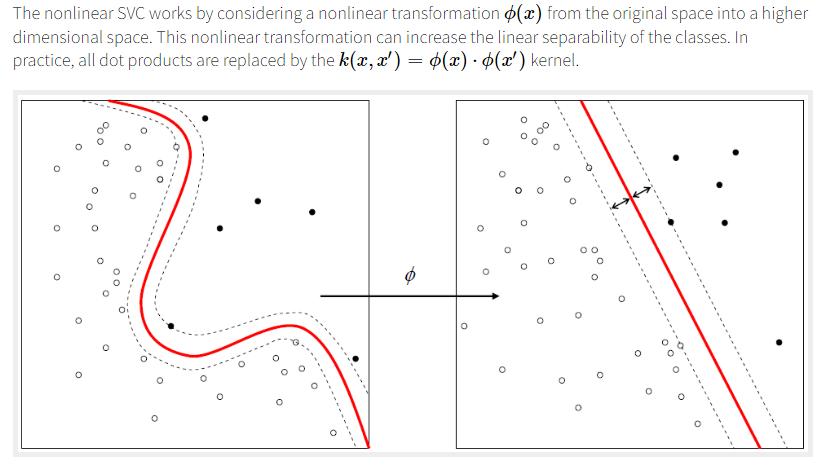

In [96]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
X = np.random.randn(200, 2)
y = X[:, 0] + X[:, 1] > 1

In [98]:
# We train the classifier.
est = svm.LinearSVC()
est.fit(X, y)

LinearSVC()

In [99]:
# We generate a grid in the square [-3,3 ]^2.
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))

In [100]:
# This function takes a SVM estimator as input.

def plot_decision_function(est, title):
    # We evaluate the decision function on the grid.
    Z = est.decision_function(np.c_[xx.ravel(),
                                    yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap = plt.cm.Blues

    # We display the decision function on the grid.
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    ax.imshow(Z,
              extent=(xx.min(), xx.max(),
                      yy.min(), yy.max()),
              aspect='auto',
              origin='lower',
              cmap=cmap)

    # We display the boundaries.
    ax.contour(xx, yy, Z, levels=[0],
               linewidths=2,
               colors='k')

    # We display the points with their true labels.
    ax.scatter(X[:, 0], X[:, 1],
               s=50, c=.5 + .5 * y,
               edgecolors='k',
               lw=1, cmap=cmap,
               vmin=0, vmax=1)
    ax.axhline(0, color='k', ls='--')
    ax.axvline(0, color='k', ls='--')
    ax.axis([-3, 3, -3, 3])
    ax.set_axis_off()
    ax.set_title(title)

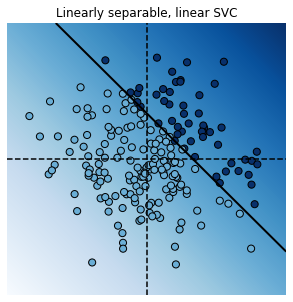

In [101]:
ax = plot_decision_function(
    est, "Linearly separable, linear SVC")

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Score: 0.5


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

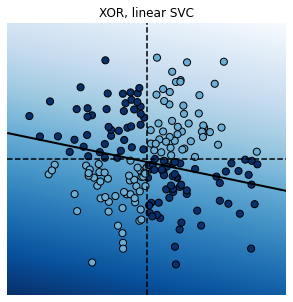

In [103]:
# XOR

y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# We train the classifier.
est = ms.GridSearchCV(svm.LinearSVC(),
                      {'C': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.1f}".format(
      ms.cross_val_score(est, X, y).mean()))

# We plot the decision function.
ax = plot_decision_function(
    est, "XOR, linear SVC")

For example gaussian Radial Basis Functions:

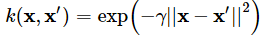

gamma is a hyperparameter of the model that can be chosen with grid search and cross-validation

Score: 0.955


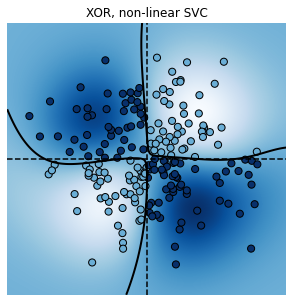

In [104]:
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

est = ms.GridSearchCV(
    svm.SVC(), {'C': np.logspace(-3., 3., 10),
                'gamma': np.logspace(-3., 3., 10)})
est.fit(X, y)
print("Score: {0:.3f}".format(
      ms.cross_val_score(est, X, y).mean()))

plot_decision_function(
    est.best_estimator_, "XOR, non-linear SVC")

## Random forest
- Multiple decision trees are trained and aggregated to form a model
- instance of bootstrap aggregating/bagging; models are trained on randomly drawn subsets
- ensemble learning

In [113]:
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
%matplotlib inline

In [114]:
data = skd.load_boston()

In [119]:
X = data['data']
y = data['target']

In [122]:
# fit the model
reg = ske.RandomForestRegressor()
reg.fit(X, y)

RandomForestRegressor()

In [124]:
feat_index = np.argsort(reg.feature_importances_)[::-1]
feat_importance = reg.feature_importances_[feat_index]

Text(0.5, 1.0, 'Features importance')

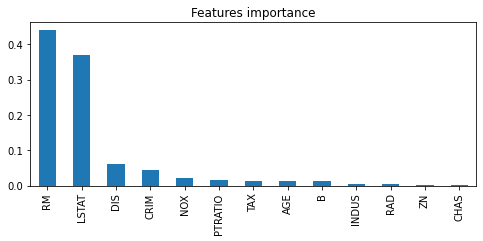

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
labels = data['feature_names'][feat_index]
pd.Series(feat_importance, index=labels).plot(kind='bar', ax=ax)
ax.set_title('Features importance')

Text(0, 0.5, 'Value of houses (k$)')

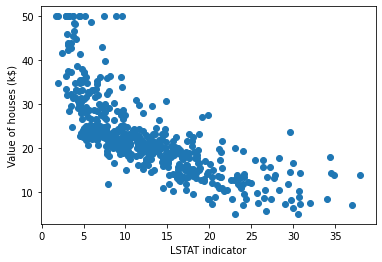

In [127]:
fig, ax = plt.subplots(1, 1)
ax.scatter(X[:, -1], y)
ax.set_xlabel('LSTAT indicator')
ax.set_ylabel('Value of houses (k$)')

## Clustering

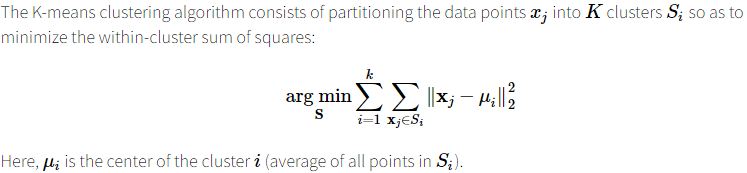

In [128]:
from itertools import permutations
import numpy as np
import sklearn
import sklearn.decomposition as dec
import sklearn.cluster as clu
import sklearn.datasets as ds
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
%matplotlib inline

In [129]:
X, y = ds.make_blobs(n_samples=200,
                     n_features=2,
                     centers=3,
                     cluster_std=1.5,
                     )

In [130]:
def relabel(cl):
    """Relabel a clustering with three clusters
    to match the original classes."""
    if np.max(cl) != 2:
        return cl
    perms = np.array(list(permutations((0, 1, 2))))
    i = np.argmin([np.sum(np.abs(perm[cl] - y))
                   for perm in perms])
    p = perms[i]
    return p[cl]

In [131]:
def display_clustering(labels, title):
    """Plot the data points with the cluster
    colors."""

    # We relabel the classes when there are 3 clusters
    labels = relabel(labels)
    fig, axes = plt.subplots(1, 2, figsize=(8, 3),
                             sharey=True)
    # Display the points with the true labels on the
    # left, and with the clustering labels on the
    # right.
    for ax, c, title in zip(
            axes,
            [y, labels],
            ["True labels", title]):
        ax.scatter(X[:, 0], X[:, 1], c=c, s=30,
                   linewidths=0, cmap=plt.cm.rainbow)
        ax.set_title(title)

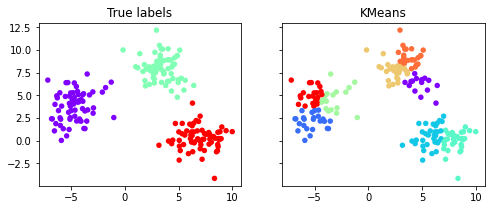

In [132]:
km = clu.KMeans()
km.fit(X)
display_clustering(km.labels_, "KMeans")

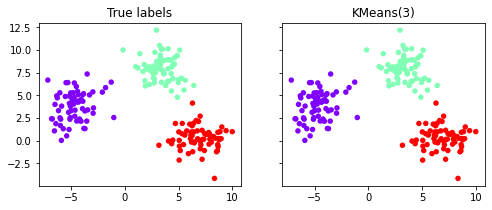

In [133]:
km = clu.KMeans(n_clusters=3)
km.fit(X)
display_clustering(km.labels_, "KMeans(3)")

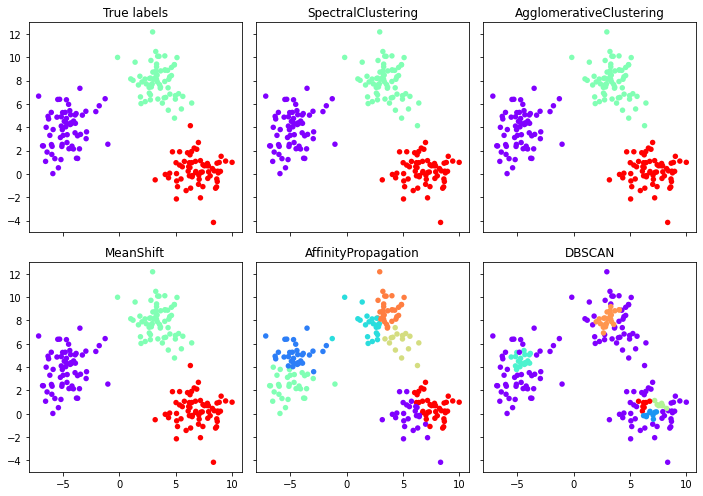

In [134]:
fig, axes = plt.subplots(2, 3,
                         figsize=(10, 7),
                         sharex=True,
                         sharey=True)

axes[0, 0].scatter(X[:, 0], X[:, 1],
                   c=y, s=30,
                   linewidths=0,
                   cmap=plt.cm.rainbow)
axes[0, 0].set_title("True labels")

for ax, est in zip(axes.flat[1:], [
    clu.SpectralClustering(3),
    clu.AgglomerativeClustering(3),
    clu.MeanShift(),
    clu.AffinityPropagation(),
    clu.DBSCAN(),
]):
    est.fit(X)
    c = relabel(est.labels_)
    ax.scatter(X[:, 0], X[:, 1], c=c, s=30,
               linewidths=0, cmap=plt.cm.rainbow)
    ax.set_title(est.__class__.__name__)

# Fix the spacing between subplots.
fig.tight_layout()